<a href="https://colab.research.google.com/github/ruchikakhemka/DeepLearning/blob/master/CNN_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import files
uploaded_file = files.upload()

Saving dogimg.jpg to dogimg.jpg


In [0]:
!ls
os.getcwd()

dogimg.jpg  sample_data


'/content'

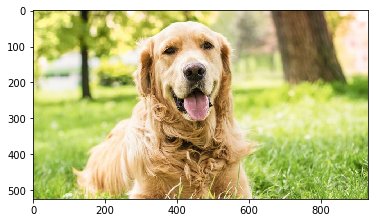

In [0]:

#Load color image

#check if image was uploaded

image = cv2.imread('/content/dogimg.jpg')
#convert an image to grayscale using OpenCV
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#img = skimage.color.rgb2gray(img)
plt.imshow(RGB_img)

In [0]:
image.shape

(524, 931, 3)

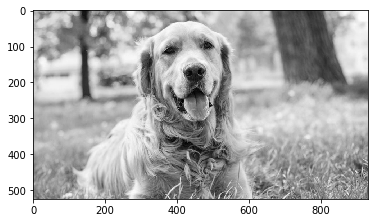

In [0]:
# Converting the image into grayscale. 
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray = gray.astype("float32")/255

#gray = cv2.imread(image,0)
plt.imshow(gray,cmap = 'gray')
plt.show()

In [0]:
#Define some filters
#we are creating 3 filters initialezed with zeros
l1_filter = np.zeros((3,3,3))
print(l1_filter)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [0]:
#giving values to filters
#horizontal edge detection
l1_filter[0::] = [[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]]

#general edge detection
l1_filter[1::] = [[0,-1,0],
                  [-1,4,-1],
                  [0,-1,0]]

#vertical edge detection
l1_filter[2::] = [[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]]

In [0]:
print(l1_filter[0])

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [0]:
gray.shape

(524, 931)

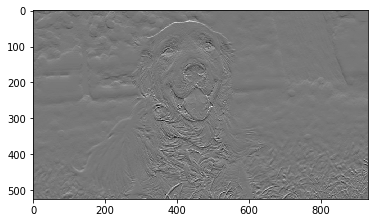

In [0]:
filtered_image = cv2.filter2D(gray, -1, l1_filter[0])
plt.imshow(filtered_image, cmap='gray')

In [0]:
#Define an convolutional layer in init function
#define neurl network using pytorch
class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    num_filters = 3
    #define convolutional layer with input size, output size and kernel size leaving
    #stride and padding to default values
    #input size is 1 as grayscale image depth is 1
    #output size = num_filters
    self.conv = nn.Conv2d(1, num_filters, kernel_size=(3, 3), bias=False)
    #setting weights
    self.conv.weight = torch.nn.Parameter(weight)
    # define a maxpooling layer of size 2x2 and a stride of 2
    self.pool = nn.MaxPool2d(2, 2)
    
  #define the feed forward function of the model
  def forward(self, x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    pooled_x = self.pool(activated_x)
    # returns all layers
    return conv_x, activated_x, pooled_x

In [0]:
#instantiate the model and setting the weights to be those from our pre-defined filters
weight = torch.from_numpy(l1_filter).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layers in the network
print(model)

Net(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [0]:
#Visualize each filtered output layer
#let's first define a function for visualizing layers